In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### CARGA ARCHIVO

In [ ]:
# 1. https://drive.google.com/file/d/16lG3-nbA8kzsgU9FdRdv_n0uFC28Xr-H/view?usp=drive_link
id='16lG3-nbA8kzsgU9FdRdv_n0uFC28Xr-H'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('item_categories.csv')

In [ ]:
# 2. https://drive.google.com/file/d/1c7mcCGabwq1dM5s82yL0ZaPU6Dzr_489/view?usp=drive_link
id='1c7mcCGabwq1dM5s82yL0ZaPU6Dzr_489'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('items.csv')

In [ ]:
# 3. https://drive.google.com/file/d/1dYfyImjwbSLzS6wu476oc6RTr6x-QU7Y/view?usp=drive_link
id='1dYfyImjwbSLzS6wu476oc6RTr6x-QU7Y'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sales_train.csv')

In [ ]:
# 4. https://drive.google.com/file/d/1gCwL27K8S9T3jDFYzPlYs141gG-KNgE3/view?usp=drive_link
id='1gCwL27K8S9T3jDFYzPlYs141gG-KNgE3'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sample_submission.csv')

In [ ]:
# 5. https://drive.google.com/file/d/1x2qB98Dz10JJLXMY2viNkDtIgMljW4uv/view?usp=drive_link
id='1x2qB98Dz10JJLXMY2viNkDtIgMljW4uv'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('shops.csv')

In [ ]:
# 6. https://drive.google.com/file/d/19BxloYpVZOT-C2Y2vZbrVZdQ9d0u3UNu/view?usp=drive_link
id='19BxloYpVZOT-C2Y2vZbrVZdQ9d0u3UNu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test.csv')

### OBSERVACION DE ARCHIVOS

In [ ]:
categories_id = pd.read_csv('item_categories.csv')
categories_id

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
items = pd.read_csv('items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
sales_train = pd.read_csv('sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00


In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,ID,item_cnt_month
0,0,0.50
1,1,0.50
2,2,0.50
3,3,0.50
4,4,0.50


In [ ]:
shops = pd.read_csv('shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### CHUSMEO

In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
items.merge(categories_id, on='item_category_id')

In [ ]:
pd.merge(items, categories_id, how='left')

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,Игры PC - Цифра
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,Книги - Цифра
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,Книги - Методические материалы 1С
22168,Яйцо для Little Inu,22168,62,"Подарки - Гаджеты, роботы, спорт"


In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
sales_train = sales_train[['shop_id', 'item_id', 'item_cnt_day']]

In [ ]:
sales_train = sales_train.merge(items, how='left')
sales_train

,shop_id,item_id,item_cnt_day,item_name,item_category_id
0,59,22154,1.00,ЯВЛЕНИЕ 2012 (BD),37
1,25,2552,1.00,DEEP PURPLE The House Of Blue Light LP,58
2,25,2552,-1.00,DEEP PURPLE The House Of Blue Light LP,58
3,25,2554,1.00,DEEP PURPLE Who Do You Think We Are LP,58
4,25,2555,1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...
2935844,25,7409,1.00,V/A Nu Jazz Selection (digipack),55
2935845,25,7460,1.00,V/A The Golden Jazz Collection 1 2CD,55
2935846,25,7459,1.00,V/A The Best Of The 3 Tenors,55
2935847,25,7440,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [ ]:
sales_train = sales_train.groupby(['shop_id', 'item_category_id'])['item_cnt_day'].sum().reset_index()
sales_train

,shop_id,item_category_id,item_cnt_day
0,0,0,1.00
1,0,1,1.00
2,0,2,105.00
3,0,3,52.00
4,0,4,38.00
...,...,...,...
3266,59,75,815.00
3267,59,77,4.00
3268,59,79,345.00
3269,59,80,30.00


In [ ]:
from textwrap import fill
sales_pivot = sales_train.pivot_table(values='item_cnt_day', columns='shop_id',index='item_category_id', fill_value= 0)
sales_pivot

shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
item_category_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,105,63,355,200,309,232,422,491,19,32,...,733,231,250,341,874,0,338,669,324,223
3,52,18,527,360,333,340,755,554,0,71,...,773,247,376,460,1098,0,472,965,574,399
4,38,30,42,28,101,38,21,92,2,0,...,92,56,55,68,103,0,46,149,80,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,222,252,501,309,639,689,1,14,...,171,0,261,360,332,0,225,235,188,345
80,0,0,0,99,5,26,62,25,0,0,...,13,0,2,8,0,12,81,0,0,30
81,44,28,2,0,31,0,52,0,0,0,...,0,109,24,0,51,0,47,81,36,0


Text(0.0, 1.0, 'Cantidad de Pasajeros por Horarios y Duración')

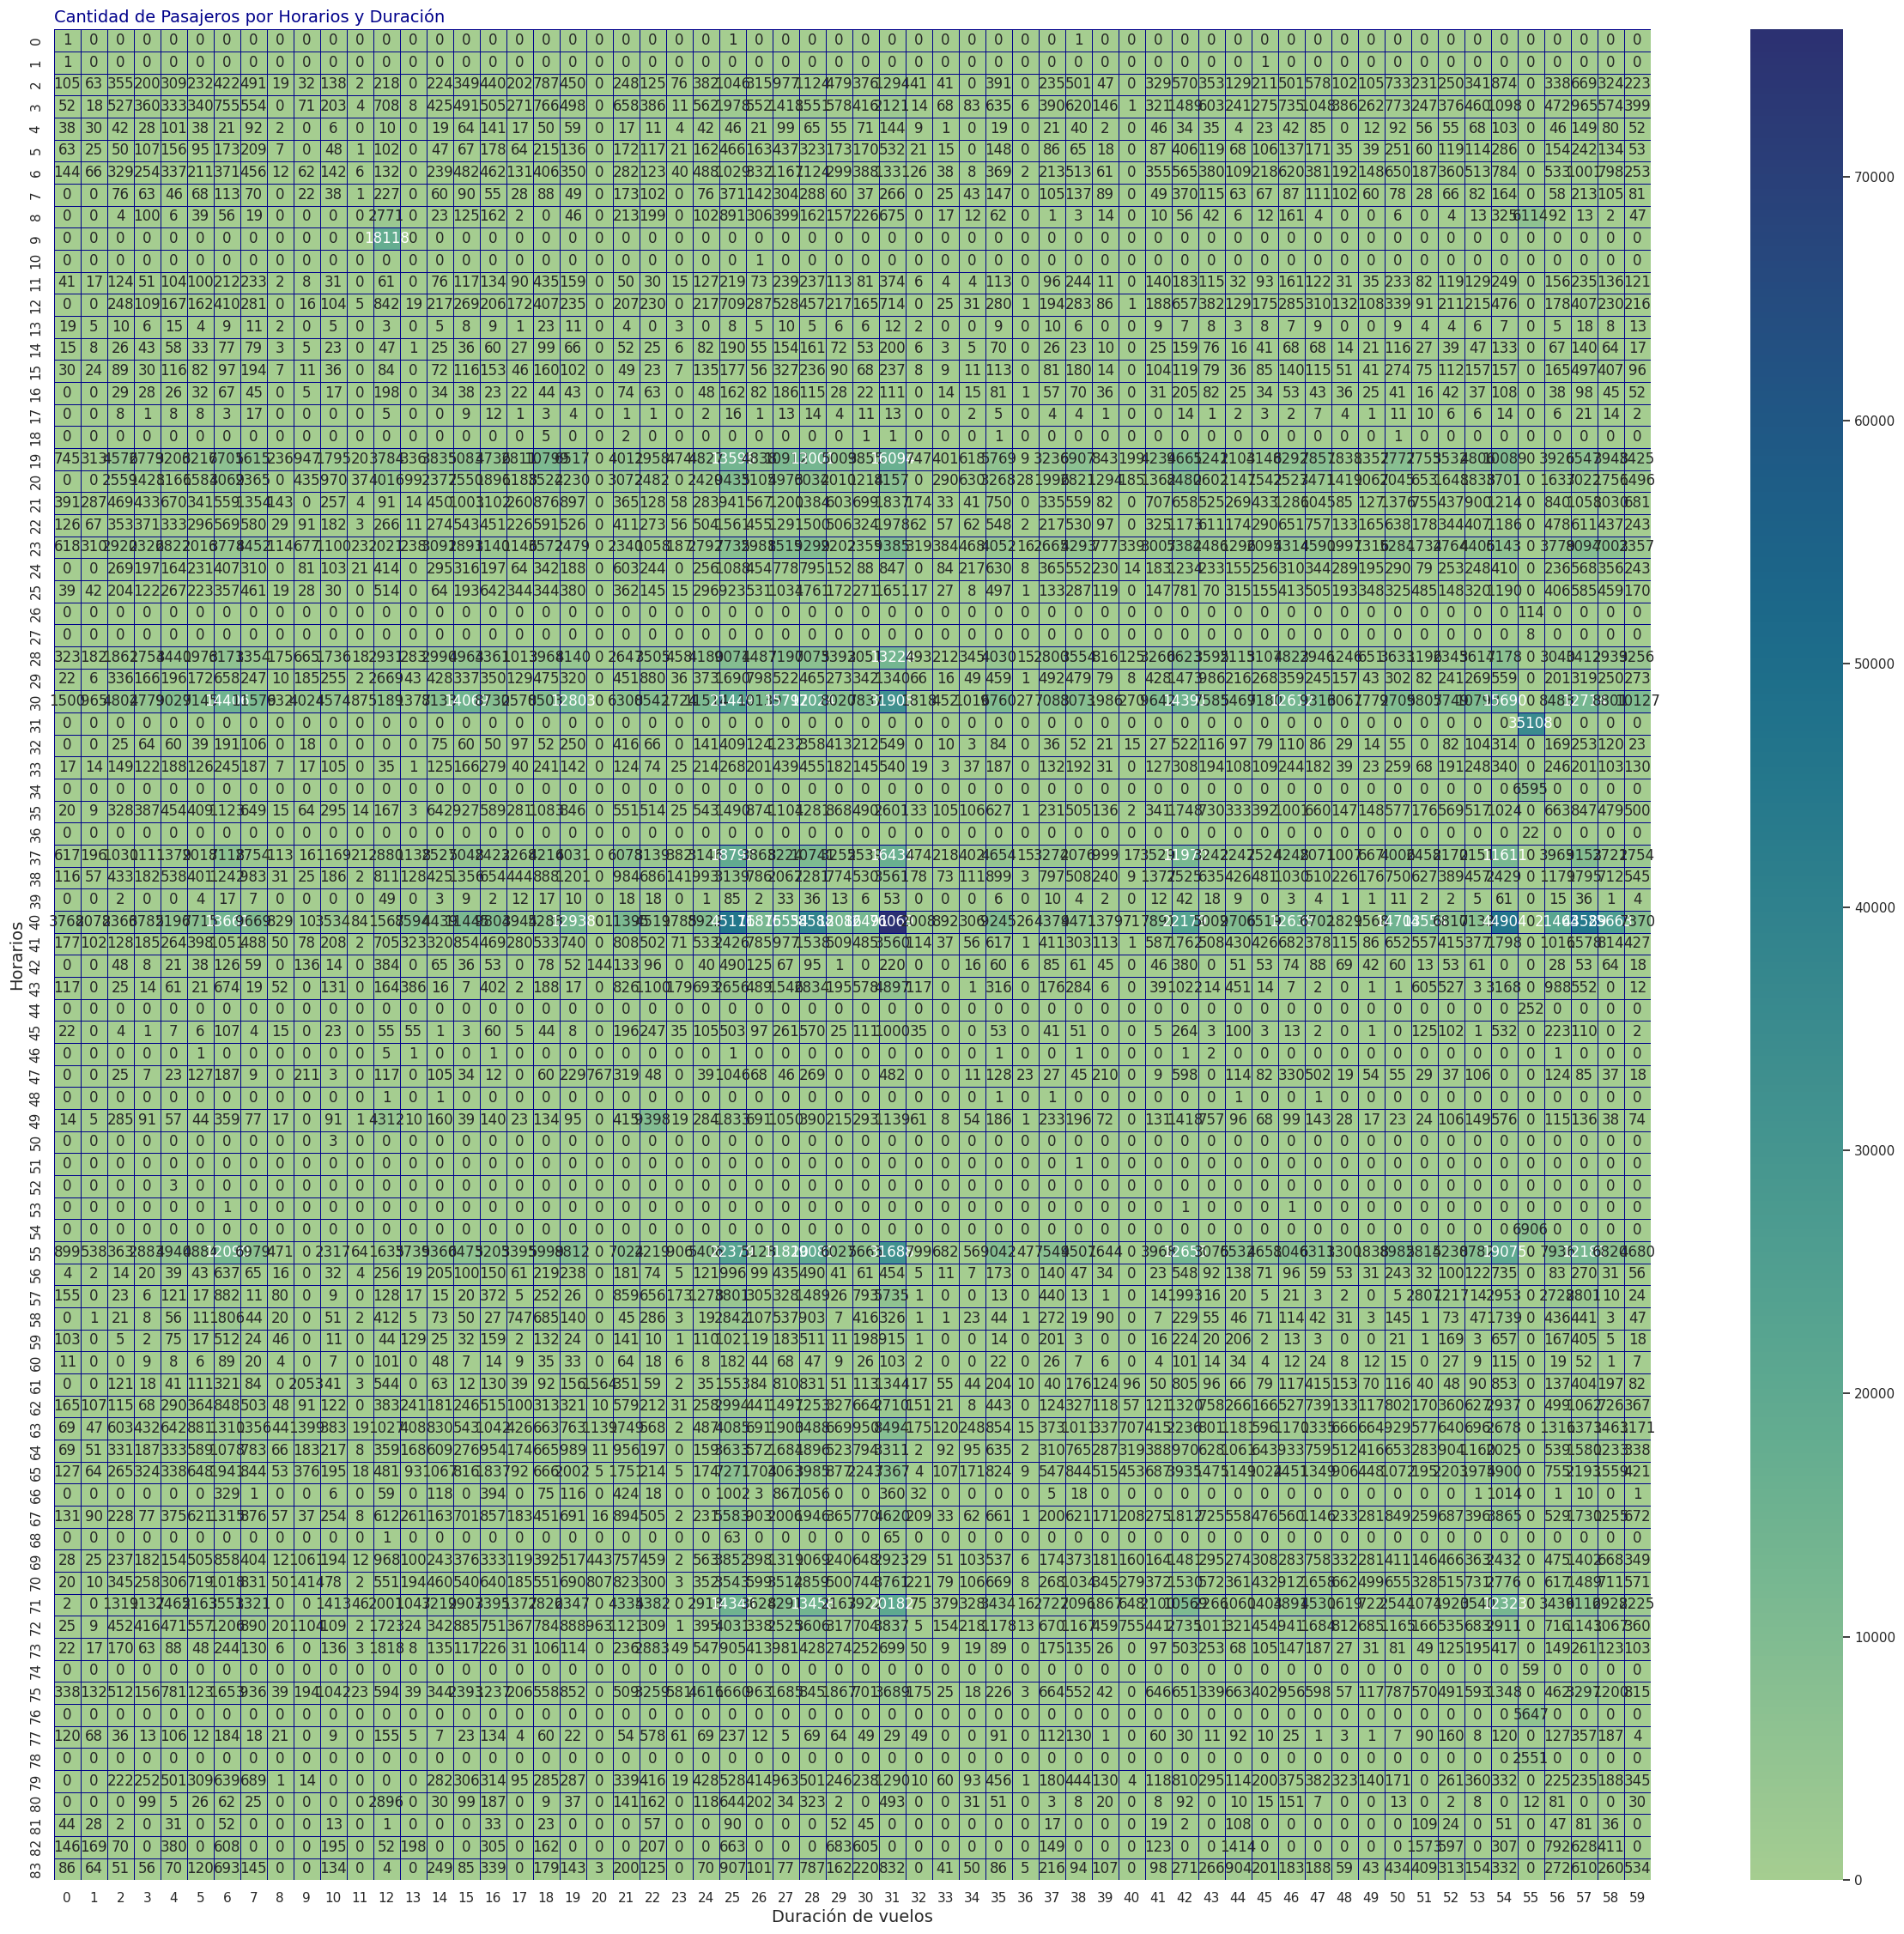

In [ ]:
plt.figure(figsize=(30,28))
s=sns.heatmap(sales_pivot, linewidth=0.5, linecolor='darkblue', annot=True, cmap='crest', fmt='g')
s.set_xlabel('Duración de vuelos', fontsize=14)
s.set_ylabel('Horarios', fontsize=14)
plt.title('Cantidad de Pasajeros por Horarios y Duración', loc='left', color='darkblue', size=14)